In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
#Loading the csv files as a dataframe
df = pd.read_csv('Calories in each meal.csv')

In [101]:
#Showing top 5 entries
df.head(5)

,DATE,MEALS,CALORIES
0,20.5.2024,cereal and milk,270
1,NaN,rice and chicken curry,1450
2,NaN,roti and daal,1200
3,21.5.2024,maggi,300
4,NaN,rice and daal,1150


In [102]:
#Showing bottom 5 entries
df.tail(5)

,DATE,MEALS,CALORIES
10,NaN,rice and egg curry,1300
11,NaN,roti and chicken curry,1200
12,24.5.2024,bread with PB&J,660
13,NaN,rice and fish curry,1400
14,NaN,rice and daal,1250


In [103]:
#Checking no. of columns and rows
df.shape

(15, 3)

In [104]:
#Finding the datatype, unique and number of unique entries in each column
for i in range(0, len(df.columns), 1):
    print('Datatype of ', df.columns[i], ':', df.dtypes[i], '\n')
    print('Unique entries in ', df.columns[i], ':', df[df.columns[i]].unique(), '\n')
    print('No. of unique entries in ', df.columns[i], ':', df[df.columns[i]].nunique(), '\n')

Datatype of  DATE : object 

Unique entries in  DATE : ['20.5.2024' nan '21.5.2024' '22.5.2024' '23.5.2024' '24.5.2024'] 

No. of unique entries in  DATE : 5 

Datatype of  MEALS : object 

Unique entries in  MEALS : ['cereal and milk' 'rice and chicken curry' 'roti and daal' 'maggi'
 'rice and daal' 'roti and fish curry' 'bread and omelette'
 'roti and chicken curry' 'roti and egg curry' 'rice and egg curry'
 'bread with PB&J' 'rice and fish curry'] 

No. of unique entries in  MEALS : 12 

Datatype of  CALORIES : int64 

Unique entries in  CALORIES : [ 270 1450 1200  300 1150  600 1000  700  450 1300  660 1400 1250] 

No. of unique entries in  CALORIES : 13 



/tmp/ipykernel_63431/525529804.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Datatype of ', df.columns[i], ':', df.dtypes[i], '\n')
/tmp/ipykernel_63431/525529804.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Datatype of ', df.columns[i], ':', df.dtypes[i], '\n')
/tmp/ipykernel_63431/525529804.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Datatype of ', df.columns[i], ':', df.dtypes[i], '\n')


In [105]:
df.isnull().sum()

DATE        10
MEALS        0
CALORIES     0
dtype: int64

In [106]:
#Finding the datatype, unique and number of unique entries in each column
df_new = df.dropna()

In [107]:
df_new.shape

(5, 3)

In [108]:
#Renaming columns
df_new = df_new.rename(columns={'DATE': 'Date'})
df_new = df_new.rename(columns={'MEALS': 'Meals'})
df_new = df_new.rename(columns={'CALORIES': 'Calories'})

In [109]:
df_new.head(5)

,Date,Meals,Calories
0,20.5.2024,cereal and milk,270
3,21.5.2024,maggi,300
6,22.5.2024,bread and omelette,300
9,23.5.2024,maggi,450
12,24.5.2024,bread with PB&J,660


In [110]:
#Dropping columns
df_new = df_new.drop(columns=['Date'])
df_new = df_new.drop(columns=['Meals'])

In [111]:
df_new.head(5)

,Calories
0,270
3,300
6,300
9,450
12,660


In [112]:
#Finding the Minumum, Maximum, Mean, Standard Deviation, Variance and Sum of that each column with numerical values
for i in range(0, len(df.columns), 1):
    if df[df.columns[i]].dtype == 'int64':
        print('Minimum of column ', i+1, ': ', df[df.columns[i]].min())
        print('Maximum of column ', i+1, ': ', df[df.columns[i]].max())
        print('Mean of column ', i+1, ': ', df[df.columns[i]].mean())
        print('Standard deviation of column ', i+1, ': ', df[df.columns[i]].std())
        print('Variance of column ', i+1, ': ', df[df.columns[i]].var())
        print('Sum of column ', i+1, ': ', df[df.columns[i]].sum())
        print('\n')

Minimum of column  3 :  270
Maximum of column  3 :  1450
Mean of column  3 :  882.0
Standard deviation of column  3 :  430.0863700633696
Variance of column  3 :  184974.2857142857
Sum of column  3 :  13230




In [113]:
#Randomly sampling 50% of new data 
df_split1 = df_new.sample(frac = 0.5)
df_split2 = df_new
for i in df_split1.index:
    df_split2 = df_split2.drop(i)

In [114]:
#Randomly sampling 50% of each split
df_random1 = df_split1.sample(frac = 0.5)
df_random2 = df_split1
for i in df_random1.index:
    df_random2 = df_random2.drop(i)

In [115]:
df_random3 = df_split2.sample(frac = 0.5)
df_random4 = df_split2
for i in df_random3.index:
    df_random4 = df_random4.drop(i)

(array([3., 1., 1., 2., 0., 0., 1., 3., 2., 2.]),
 array([ 270.,  388.,  506.,  624.,  742.,  860.,  978., 1096., 1214.,
        1332., 1450.]),
 <BarContainer object of 10 artists>)

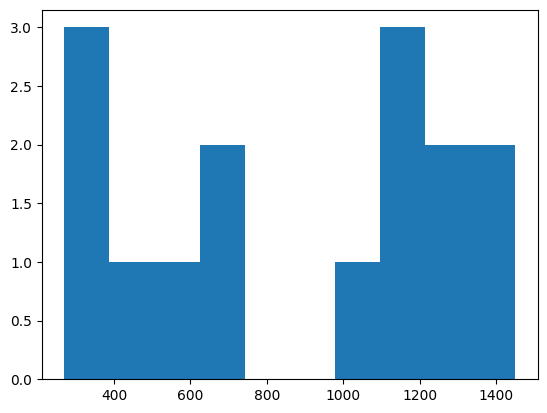

In [116]:
#creating histogram
plt.hist(df['CALORIES'], bins = 10)

(array([2., 1., 2., 2., 1., 1., 2., 1., 1., 2.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <BarContainer object of 10 artists>)

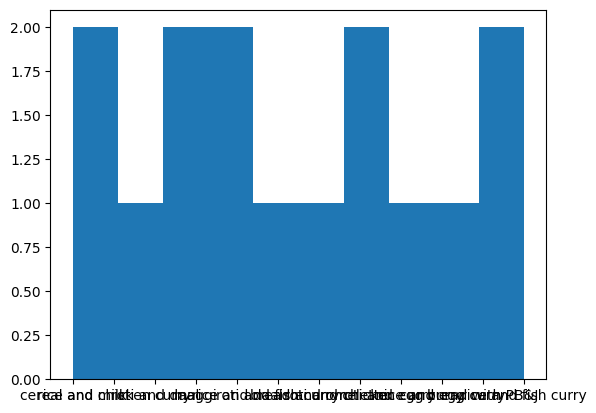

In [117]:
plt.hist(df['MEALS'], bins = 10)

<Axes: ylabel='MEALS'>

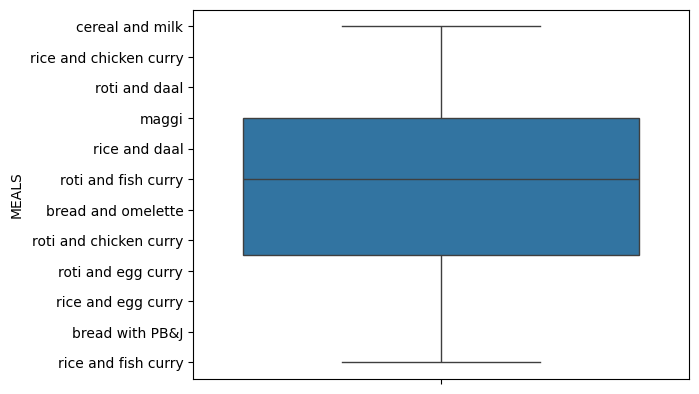

In [118]:
#Creating boxplot
sns.boxplot(df['MEALS'])

<Axes: ylabel='CALORIES'>

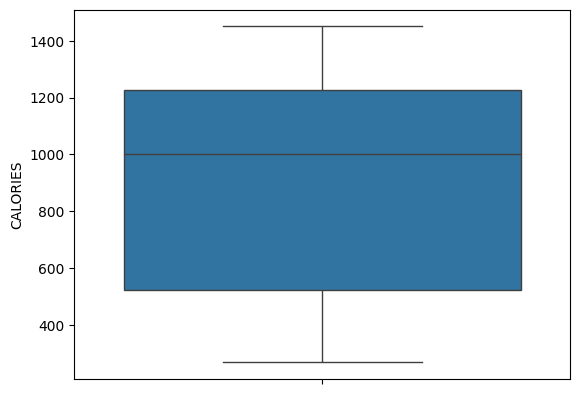

In [119]:
sns.boxplot(df['CALORIES'])

In [120]:
df.head(1)

,DATE,MEALS,CALORIES
0,20.5.2024,cereal and milk,270
